In [1]:
# Kütüphane tanıtımları ve veri okuma

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import itertools
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score, roc_auc_score, f1_score
from sklearn.preprocessing import label_binarize
from sklearn.feature_selection import RFECV
import xgboost as xgb

# Burada kendi path'inizi ekleyebilirsiniz.
df = pd.read_excel('df_whole_tdb_2.xlsx')


In [2]:
df_backup = df

In [3]:
# Convert boolean columns to integers
features_to_change = ['Current_Word_Status',
       'Is_Current_Word_Capitalized', 'One_Word_Before_Current_Word_Status',
       'Two_Word_Before_Current_Word_Status',
       'Three_Word_Before_Current_Word_Status',
       'One_Word_After_Current_Word_Status',
       'Two_Word_After_Current_Word_Status',
       'Three_Word_After_Current_Word_Status',
       'Is_One_Word_Before_Current_Word_Capitalized',
       'Is_Two_Word_Before_Current_Word_Capitalized',
       'Is_Three_Word_Before_Current_Word_Capitalized',
       'Is_One_Word_After_Current_Word_Capitalized',
       'Is_Two_Word_After_Current_Word_Capitalized',
       'Is_Three_Word_After_Current_Word_Capitalized',
       'Number_of_Words_After_Current_Word_in_Sentence',
       'Number_of_Words_Before_Current_Word_in_Sentence',
       'Length_of_Current_Word', 'Length_of_Sentence_of_the_Current_Word',
       'Distance_to_Previous_Verb', 'Distance_to_Next_Verb', 'Word_ID', 'prev_verb_ID', 
       'next_verb_ID', 'Word-1_ID', 'Word-2_ID', 'Word-3_ID', 'Word+1_ID', 'Word+2_ID', 'Word+3_ID']

default_value = 0  # Example default value
for col in features_to_change:
    df[col] = df[col].fillna(default_value).astype(int)



In [4]:
#df['File_Name'] = df['File_Name'].astype(str) +".txt"

In [5]:
# Allocate pairs to train, test, and development sets
train_files = ['00001231.txt',
 '00002113.txt',
 '00002213.txt',
 '00003121.txt',
 '00003221.txt',
 '00005121.txt',
 '00005221.txt',
 '00007121.txt',
 '00007221.txt',
 '00008113.txt',
 '00008213.txt',
 '00010111.txt',
 '00010211.txt',
 '00011112.txt',
 '00012112.txt',
 '00013112.txt',
 '00014113.txt',
 '00014213.txt',
 '00016112.txt',
 '00017113.txt',
 '00018112.txt',
 '00019131.txt',
 '00019232.txt',
 '00020112.txt',
 '00022231.txt',
 '00023113.txt',
 '00023213.txt',
 '00024120.txt',
 '00024220.txt',
 '00025120.txt',
 '00025220.txt',
 '00026131.txt',
 '00027113.txt',
 '00027213.txt',
 '00028120.txt',
 '00028220.txt',
 '00030130.txt',
 '00030224.txt',
 '00032161.txt',
 '00032261.txt',
 '00033123.txt',
 '00035220.txt',
 '00045124.txt',
 '00045224.txt',
 '00046124.txt',
 '00046224.txt',
 '00047124.txt',
 '00047224.txt',
 '00048120.txt',
 '00050120.txt',
 '00051120.txt',
 '00051220.txt',
 '00053123.txt',
 '00053223.txt',
 '00054123.txt',
 '00054223.txt',
 '00055121.txt',
 '00057221.txt',
 '00058111.txt',
 '00058211.txt',
 '00059131.txt',
 '00059232.txt',
 '00060111.txt',
 '00060211.txt',
 '00062111.txt',
 '00063260.txt',
 '00064111.txt',
 '00064211.txt',
 '00065111.txt',
 '00068131.txt',
 '00068231.txt',
 '00075133.txt',
 '00075233.txt',
 '00095133.txt',
 '00199170.txt',
 '10010000.txt',
 '10020000.txt',
 '10030000.txt',
 '10040000.txt',
 '10050000.txt',
 '10060000.txt',
 '10090000.txt',
 '10100000.txt',
 '10110000.txt',
 '10120000.txt',
 '10130000.txt',
 '10140000.txt',
 '10150000.txt',
 '10160000.txt',
 '10200000.txt',
 '10210000.txt',
 '10220000.txt',
 '10230000.txt',
 '10240000.txt',
 '10250000.txt',
 '10260000.txt',
 '10290000.txt',
 '10300000.txt',
 '10310000.txt',
 '10320000.txt',
 '10330000.txt',
 '10340000.txt',
 '10350000.txt',
 '10360000.txt',
 '10390000.txt',
 '10400000.txt',
 '10510000.txt',
 '10520000.txt',
 '10530000.txt',
 '10550000.txt',
 '10560000.txt',
 '10570000.txt',
 '10600000.txt',
 '10610000.txt',
 '10620000.txt',
 '10630000.txt',
 '10640000.txt',
 '10650000.txt',
 '10660000.txt',
 '10670000.txt',
 '10700000.txt',
 '20190000.txt',
 '20200000.txt',
 '20210000.txt',
 '20220000.txt',
 '20230000.txt',
 '20240000.txt',
 '20250000.txt',
 '20280000.txt',
 '20290000.txt',
 '20300000.txt',
 '20310000.txt',
 '20320000.txt',
 '20330000.txt',
 '20340000.txt',
 '20350000.txt',
 '20380000.txt',
 '20390000.txt',
 '20400000.txt',
 '20410000.txt',
 '20420000.txt',
 '20430000.txt',
 '20440000.txt',
 '20450000.txt',
 '20480000.txt',
 '20490000.txt',
 '20500000.txt',
 '20510000.txt',
 '20520000.txt',
 '20530000.txt',
 '20540000.txt',
 '20550000.txt',
 '20570000.txt',
 '20580000.txt',
 '20600000.txt',
 '20610000.txt',
 '20620000.txt',
 '20630000.txt',
 '20640000.txt']
test_files = ['00001131.txt',
 '00006231.txt',
 '00013212.txt',
 '00022131.txt',
 '00035120.txt',
 '00055221.txt',
 '00057121.txt',
 '00063160.txt',
 '00077211.txt',
 '10080000.txt',
 '10190000.txt',
 '10280000.txt',
 '10380000.txt',
 '10590000.txt',
 '10690000.txt',
 '20270000.txt',
 '20370000.txt',
 '20470000.txt',
 '20590000.txt']
dev_files = ['00006131.txt',
 '00020212.txt',
 '00026231.txt',
 '00033223.txt',
 '00048220.txt',
 '00050220.txt',
 '00062211.txt',
 '00077111.txt',
 '10070000.txt',
 '10170000.txt',
 '10180000.txt',
 '10270000.txt',
 '10370000.txt',
 '10580000.txt',
 '10680000.txt',
 '20260000.txt',
 '20360000.txt',
 '20460000.txt',
 '20560000.txt']
all_files = train_files + test_files + dev_files
all_files

['00001231.txt',
 '00002113.txt',
 '00002213.txt',
 '00003121.txt',
 '00003221.txt',
 '00005121.txt',
 '00005221.txt',
 '00007121.txt',
 '00007221.txt',
 '00008113.txt',
 '00008213.txt',
 '00010111.txt',
 '00010211.txt',
 '00011112.txt',
 '00012112.txt',
 '00013112.txt',
 '00014113.txt',
 '00014213.txt',
 '00016112.txt',
 '00017113.txt',
 '00018112.txt',
 '00019131.txt',
 '00019232.txt',
 '00020112.txt',
 '00022231.txt',
 '00023113.txt',
 '00023213.txt',
 '00024120.txt',
 '00024220.txt',
 '00025120.txt',
 '00025220.txt',
 '00026131.txt',
 '00027113.txt',
 '00027213.txt',
 '00028120.txt',
 '00028220.txt',
 '00030130.txt',
 '00030224.txt',
 '00032161.txt',
 '00032261.txt',
 '00033123.txt',
 '00035220.txt',
 '00045124.txt',
 '00045224.txt',
 '00046124.txt',
 '00046224.txt',
 '00047124.txt',
 '00047224.txt',
 '00048120.txt',
 '00050120.txt',
 '00051120.txt',
 '00051220.txt',
 '00053123.txt',
 '00053223.txt',
 '00054123.txt',
 '00054223.txt',
 '00055121.txt',
 '00057221.txt',
 '00058111.txt

In [6]:
# Creating the mapping from the numeric part with leading zeros to the full file name
file_name_mapping = {name.split('.')[0]: name for name in all_files}

# Function to find the matching file name with leading zeros
def match_file_name(numeric_part):
    # Convert to string without leading zeros
    numeric_str = str(numeric_part)
    # Search for a matching file name
    for key in file_name_mapping.keys():
        if key.endswith(numeric_str):
            return file_name_mapping[key]
    return None  # Return None or some default value if no match is found

# Apply the function to update the File_Name column
df['File_Name'] = df['File_Name'].apply(match_file_name)

df['File_Name']

0         00001231.txt
1         00001231.txt
2         00001231.txt
3         00001231.txt
4         00001231.txt
              ...     
487354    20560000.txt
487355    20560000.txt
487356    20560000.txt
487357    20560000.txt
487358    20560000.txt
Name: File_Name, Length: 487359, dtype: object

In [7]:
df['File_Name'].unique()

array(['00001231.txt', '00002113.txt', '00002213.txt', '00003121.txt',
       '00003221.txt', '00005121.txt', '00005221.txt', '00007121.txt',
       '00007221.txt', '00008113.txt', '00008213.txt', '00010111.txt',
       '00010211.txt', '00011112.txt', '00012112.txt', '00013112.txt',
       '00014113.txt', '00014213.txt', '00016112.txt', '00017113.txt',
       '00018112.txt', '00019131.txt', '00019232.txt', '00020112.txt',
       '00022231.txt', '00023113.txt', '00023213.txt', '00024120.txt',
       '00024220.txt', '00025120.txt', '00025220.txt', '00026131.txt',
       '00027113.txt', '00027213.txt', '00028120.txt', '00028220.txt',
       '00030130.txt', '00030224.txt', '00032161.txt', '00032261.txt',
       '00033123.txt', '00035220.txt', '00045124.txt', '00045224.txt',
       '00046124.txt', '00046224.txt', '00047124.txt', '00047224.txt',
       '00048120.txt', '00050120.txt', '00051120.txt', '00051220.txt',
       '00053123.txt', '00053223.txt', '00054123.txt', '00054223.txt',
      

In [8]:
# Create datasets based on selected file pairs
train_set = df[df['File_Name'].isin(train_files)]
test_set = df[df['File_Name'].isin(test_files)]
dev_set = df[df['File_Name'].isin(dev_files)]

In [9]:
# List of datasets
datasets = [('Train Set', train_set), ('Test Set', test_set), ('Dev Set', dev_set)]

for name, dataset in datasets:
    label_frequencies = dataset['Label'].value_counts()
    label_rates = dataset['Label'].value_counts(normalize=True)  # This calculates the proportion
    
    print(f"{name} Label Frequencies:\n{label_frequencies}\n")
    print(f"{name} Label Rates:\n{label_rates}\n")

Train Set Label Frequencies:
Label
0    385256
1      7044
2      1259
Name: count, dtype: int64

Train Set Label Rates:
Label
0    0.978903
1    0.017898
2    0.003199
Name: proportion, dtype: float64

Test Set Label Frequencies:
Label
0    45944
1      849
2      165
Name: count, dtype: int64

Test Set Label Rates:
Label
0    0.978406
1    0.018080
2    0.003514
Name: proportion, dtype: float64

Dev Set Label Frequencies:
Label
0    45939
1      773
2      130
Name: count, dtype: int64

Dev Set Label Rates:
Label
0    0.980722
1    0.016502
2    0.002775
Name: proportion, dtype: float64



In [9]:
combined_set = pd.concat([train_set, dev_set])
combined_set

,Current_Word,Current_Word_Status,Is_Punct,Is_Current_Word_Capitalized,Length_of_Current_Word,Number_of_Words_After_Current_Word_in_Sentence,Number_of_Words_Before_Current_Word_in_Sentence,One_Word_Before_Current_Word,Two_Word_Before_Current_Word,Three_Word_Before_Current_Word,...,Distance_to_Next_Verb,prev_verb_ID,next_verb_ID,Word_ID,Word-1_ID,Word-2_ID,Word-3_ID,Word+1_ID,Word+2_ID,Word+3_ID
0,NÜ,0,False,1,2,13,0,NaN,NaN,NaN,...,12,0,13,1,2,3,4,0,0,0
1,PERİDE,0,False,1,6,12,1,NÜ,NaN,NaN,...,11,0,13,2,3,4,5,1,0,0
2,Hakan,0,False,1,5,11,2,PERİDE,NÜ,NaN,...,10,0,13,3,4,5,6,2,1,0
3,Akdoğan,0,False,1,7,10,3,Hakan,PERİDE,NÜ,...,9,0,13,4,5,6,7,3,2,1
4,Roman,0,False,1,5,9,4,Akdoğan,Hakan,PERİDE,...,8,0,13,5,6,7,8,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487354,trilyon,0,False,0,7,4,6,302,sadece,için,...,3,13143,90104,47024,17063,6243,90104,73331,6851,104
487355,lira,0,False,0,4,3,7,trilyon,302,sadece,...,2,13143,90104,17063,6243,90104,14,47024,73331,6851
487356,karşılık,0,False,0,8,2,8,lira,trilyon,302,...,1,13143,90104,6243,90104,14,0,17063,47024,73331
487357,ayırabildi,1,False,0,10,1,9,karşılık,lira,trilyon,...,0,90104,90104,90104,14,0,0,6243,17063,47024


In [10]:
features = ['Current_Word_Status',
       'Is_Current_Word_Capitalized', 'One_Word_Before_Current_Word_Status',
       'Two_Word_Before_Current_Word_Status',
       'Three_Word_Before_Current_Word_Status',
       'One_Word_After_Current_Word_Status',
       'Two_Word_After_Current_Word_Status',
       'Three_Word_After_Current_Word_Status',
       'Is_One_Word_Before_Current_Word_Capitalized',
       'Is_Two_Word_Before_Current_Word_Capitalized',
       'Is_Three_Word_Before_Current_Word_Capitalized',
       'Is_One_Word_After_Current_Word_Capitalized',
       'Is_Two_Word_After_Current_Word_Capitalized',
       'Is_Three_Word_After_Current_Word_Capitalized',
       'Number_of_Words_After_Current_Word_in_Sentence',
       'Number_of_Words_Before_Current_Word_in_Sentence',
       'Length_of_Current_Word', 'Length_of_Sentence_of_the_Current_Word',
       'Distance_to_Previous_Verb', 'Distance_to_Next_Verb',  'Word_ID', 'prev_verb_ID', 
       'next_verb_ID', 'Word-1_ID', 'Word-2_ID', 'Word-3_ID', 'Word+1_ID', 'Word+2_ID', 'Word+3_ID']


In [11]:
test_set["Label"]

391304    0
391305    0
391306    0
391307    0
391308    0
         ..
438257    0
438258    0
438259    0
438260    0
438261    0
Name: Label, Length: 46958, dtype: int64

In [12]:
best_params = {'learning_rate': 0.20, 'max_depth': 10, 'n_estimators': 400, 'min_child_weight': 1, 'max_delta_step': 2}

In [13]:

import time
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Assuming the rest of your code is correct and 'best_params', 'train_set', 'test_set', and 'boolean_columns' are defined elsewhere

# Split for same distribution data - connective-based (Inference time with best parameters and features.)

# Split the rest of the data into training and testing sets
X_train, X_test, y_train, y_test = combined_set[features], test_set[features], combined_set['Label'], test_set['Label']

# Initialize the XGBoost Classifier
xgb_clf = xgb.XGBClassifier(**best_params, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Start timing
start_time = time.time()
# Train the model
xgb_clf.fit(X_train, y_train)
# End timing
end_time = time.time()

# Start timing
start_time_2 = time.time()

# Predict on the test set
y_pred = xgb_clf.predict(X_test)

# End timing
end_time_2 = time.time()

# Calculate inference time
inference_time = end_time - start_time
inference_time_2 = end_time_2 - start_time_2
print(f"Training Time: {inference_time} seconds")
print(f"Inference Time: {inference_time_2} seconds")

# Evaluate the model
print(classification_report(y_test, y_pred))

from sklearn.metrics import precision_score, recall_score, f1_score

# Macro average
overall_precision_macro = precision_score(y_test, y_pred, average='macro')
overall_recall_macro = recall_score(y_test, y_pred, average='macro')
overall_f1_score_macro = f1_score(y_test, y_pred, average='macro')

print(f"Overall Precision (Macro): {overall_precision_macro}")
print(f"Overall Recall (Macro): {overall_recall_macro}")
print(f"Overall F1 Score (Macro): {overall_f1_score_macro}")

# Weighted average
overall_precision_weighted = precision_score(y_test, y_pred, average='weighted')
overall_recall_weighted = recall_score(y_test, y_pred, average='weighted')
overall_f1_score_weighted = f1_score(y_test, y_pred, average='weighted')

print(f"Overall Precision (Weighted): {overall_precision_weighted}")
print(f"Overall Recall (Weighted): {overall_recall_weighted}")
print(f"Overall F1 Score (Weighted): {overall_f1_score_weighted}")

# Micro average (if needed)
overall_precision_micro = precision_score(y_test, y_pred, average='micro')
overall_recall_micro = recall_score(y_test, y_pred, average='micro')
overall_f1_score_micro = f1_score(y_test, y_pred, average='micro')

print(f"Overall Precision (Micro): {overall_precision_micro}")
print(f"Overall Recall (Micro): {overall_recall_micro}")
print(f"Overall F1 Score (Micro): {overall_f1_score_micro}")


Training Time: 1321.738174200058 seconds
Inference Time: 1.1715989112854004 seconds
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     45944
           1       0.89      0.75      0.82       849
           2       0.92      0.49      0.64       165

    accuracy                           0.99     46958
   macro avg       0.93      0.75      0.82     46958
weighted avg       0.99      0.99      0.99     46958

Overall Precision (Macro): 0.934750887490649
Overall Recall (Macro): 0.7476290151776025
Overall F1 Score (Macro): 0.81751637904827
Overall Precision (Weighted): 0.9915435276921016
Overall Recall (Weighted): 0.991950253417948
Overall F1 Score (Weighted): 0.9914101342880752
Overall Precision (Micro): 0.991950253417948
Overall Recall (Micro): 0.991950253417948
Overall F1 Score (Micro): 0.991950253417948


In [14]:
y_pred_imbalanced = y_pred

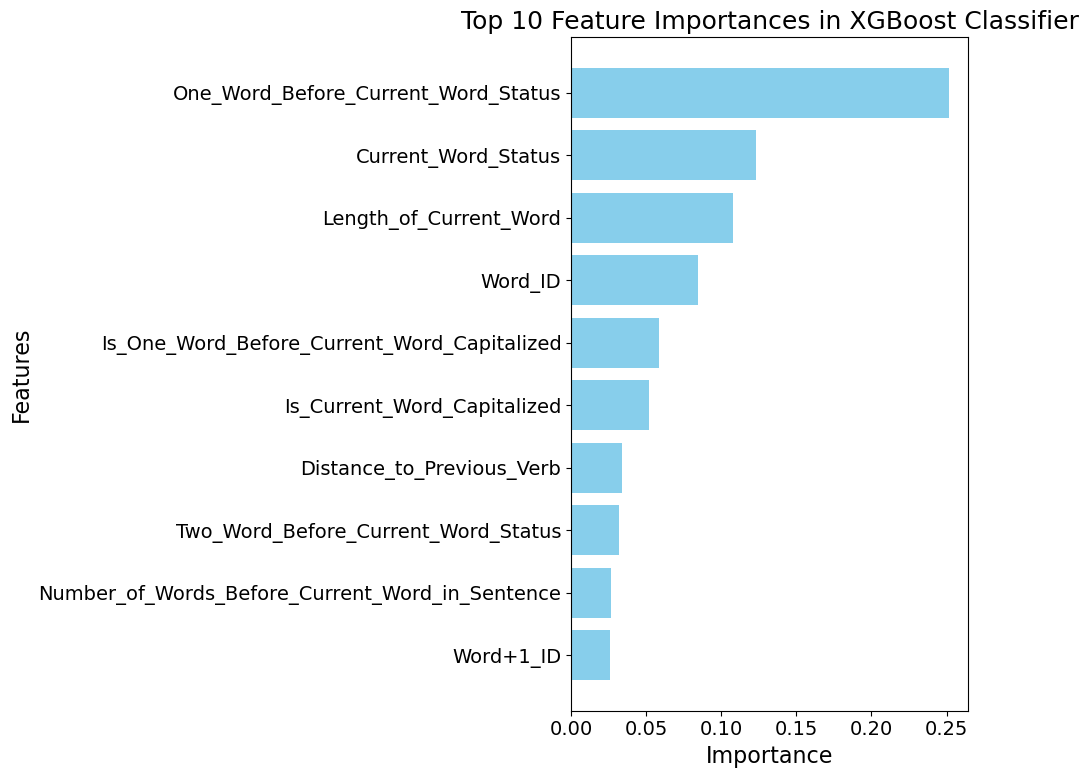

In [15]:
import matplotlib.pyplot as plt

# Set global font size
plt.rcParams.update({'font.size': 14})  # You can adjust the number to your preference

# Get feature importances
feature_importances = xgb_clf.feature_importances_

# Combine feature names and their importances
features_and_importances = zip(features, feature_importances)

# Sort the features by importance
sorted_features_and_importances = sorted(features_and_importances, key=lambda x: x[1], reverse=True)

# Select only the top 10 most important features
top_features_and_importances = sorted_features_and_importances[:10]

# Extract feature names and their importances for the top 10
feature_names, importances = zip(*top_features_and_importances)

# Create a bar chart for the top 10 feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importance', fontsize=16)  # Increase font size for x-axis label
plt.ylabel('Features', fontsize=16)  # Increase font size for y-axis label
plt.title('Top 10 Feature Importances in XGBoost Classifier', fontsize=18)  # Increase font size for title
plt.xticks(fontsize=14)  # Increase font size for x-axis ticks
plt.yticks(fontsize=14)  # Increase font size for y-axis ticks
plt.gca().invert_yaxis()
plt.tight_layout()  # Adjust layout to make room for the larger text
plt.show()


In [16]:
# Assuming test_set is your original DataFrame and y_pred is your predictions array
# Step 1: Create df_pred with just the Current_Word and File_Name columns
df_pred_imbalanced_weights = test_set[['Current_Word', 'File_Name']].copy()

# Step 2: Add the y_pred array as a new column to df_pred
df_pred_imbalanced_weights['pred'] = y_pred

# Now df_pred has the Current_Word, File_Name, and pred columns
# Write df_pred to an Excel file
df_pred_imbalanced_weights.to_excel("df_pred_imbalanced_weights_tdb.xlsx", index=False)


In [17]:
# This is working now
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
import time

# Assuming the rest of your code is correct and 'best_params', 'train_set', 'test_set', and 'boolean_columns' are defined elsewhere

# Split the rest of the data into training and testing sets
X_train, X_test, y_train, y_test = combined_set[features], test_set[features], combined_set['Label'], test_set['Label']

# Remove scale_pos_weight for multi-class classification
xgb_clf = xgb.XGBClassifier(**best_params, random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Optionally compute class weights manually and use them during training
# Example: Calculate class weights inversely proportional to class frequencies
class_weights = len(y_train) / (y_train.nunique() * y_train.value_counts())
weights = y_train.map(class_weights)

# Start timing for training
start_time = time.time()

# Train the model with optional weights
xgb_clf.fit(X_train, y_train, sample_weight=weights)

# End timing for training
end_time = time.time()

# Start timing for inference
start_time_2 = time.time()
# Predict on the test set
y_pred = xgb_clf.predict(X_test)
# End timing for inference
end_time_2 = time.time()

# Calculate and print inference times
inference_time = end_time - start_time
inference_time_2 = end_time_2 - start_time_2
print(f"Training Time: {inference_time} seconds")
print(f"Inference Time: {inference_time_2} seconds")

# Evaluate the model
print(classification_report(y_test, y_pred))

from sklearn.metrics import precision_score, recall_score, f1_score

# Macro average
overall_precision_macro = precision_score(y_test, y_pred, average='macro')
overall_recall_macro = recall_score(y_test, y_pred, average='macro')
overall_f1_score_macro = f1_score(y_test, y_pred, average='macro')

print(f"Overall Precision (Macro): {overall_precision_macro}")
print(f"Overall Recall (Macro): {overall_recall_macro}")
print(f"Overall F1 Score (Macro): {overall_f1_score_macro}")

# Weighted average
overall_precision_weighted = precision_score(y_test, y_pred, average='weighted')
overall_recall_weighted = recall_score(y_test, y_pred, average='weighted')
overall_f1_score_weighted = f1_score(y_test, y_pred, average='weighted')

print(f"Overall Precision (Weighted): {overall_precision_weighted}")
print(f"Overall Recall (Weighted): {overall_recall_weighted}")
print(f"Overall F1 Score (Weighted): {overall_f1_score_weighted}")

# Micro average (if needed)
overall_precision_micro = precision_score(y_test, y_pred, average='micro')
overall_recall_micro = recall_score(y_test, y_pred, average='micro')
overall_f1_score_micro = f1_score(y_test, y_pred, average='micro')

print(f"Overall Precision (Micro): {overall_precision_micro}")
print(f"Overall Recall (Micro): {overall_recall_micro}")
print(f"Overall F1 Score (Micro): {overall_f1_score_micro}")


Training Time: 1323.7124619483948 seconds
Inference Time: 1.5487594604492188 seconds
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45944
           1       0.84      0.84      0.84       849
           2       0.78      0.67      0.72       165

    accuracy                           0.99     46958
   macro avg       0.87      0.83      0.85     46958
weighted avg       0.99      0.99      0.99     46958

Overall Precision (Macro): 0.8721375275491029
Overall Recall (Macro): 0.8335176447030546
Overall F1 Score (Macro): 0.8513433458050176
Overall Precision (Weighted): 0.9922772873688939
Overall Recall (Weighted): 0.9923974615613953
Overall F1 Score (Weighted): 0.992321606512728
Overall Precision (Micro): 0.9923974615613953
Overall Recall (Micro): 0.9923974615613953
Overall F1 Score (Micro): 0.9923974615613953


In [18]:
y_pred_balanced = y_pred

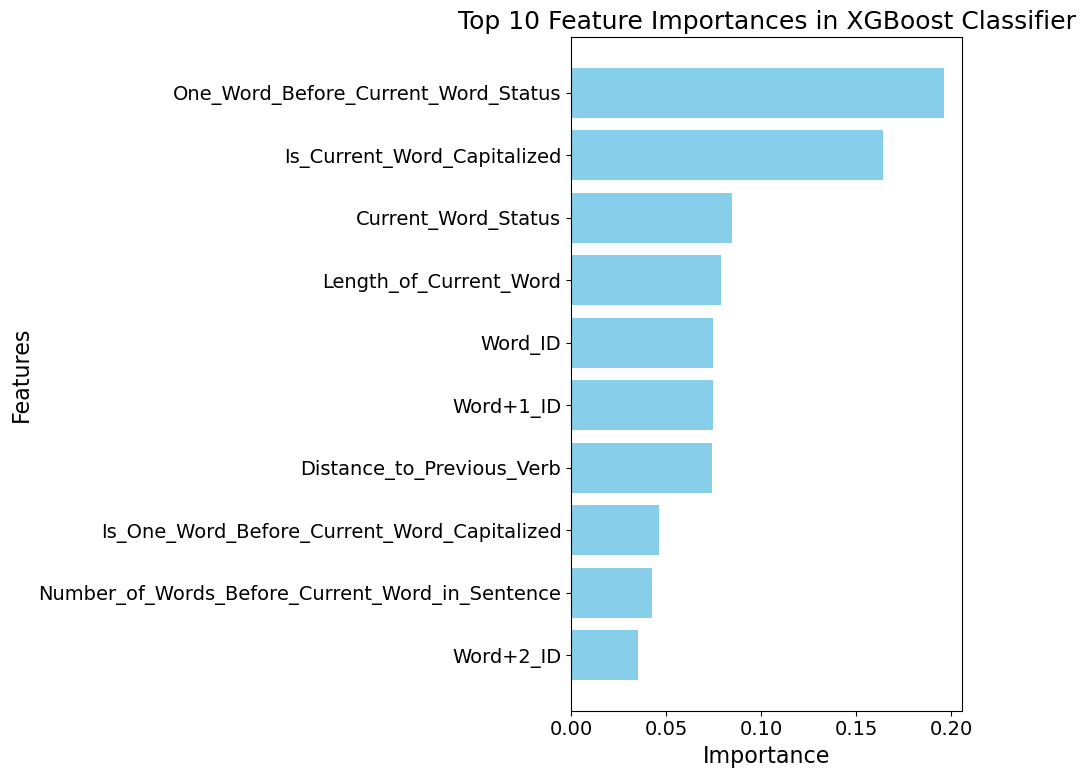

In [19]:
import matplotlib.pyplot as plt

# Set global font size
plt.rcParams.update({'font.size': 14})  # You can adjust the number to your preference

# Get feature importances
feature_importances = xgb_clf.feature_importances_

# Combine feature names and their importances
features_and_importances = zip(features, feature_importances)

# Sort the features by importance
sorted_features_and_importances = sorted(features_and_importances, key=lambda x: x[1], reverse=True)

# Select only the top 10 most important features
top_features_and_importances = sorted_features_and_importances[:10]

# Extract feature names and their importances for the top 10
feature_names, importances = zip(*top_features_and_importances)

# Create a bar chart for the top 10 feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importance', fontsize=16)  # Increase font size for x-axis label
plt.ylabel('Features', fontsize=16)  # Increase font size for y-axis label
plt.title('Top 10 Feature Importances in XGBoost Classifier', fontsize=18)  # Increase font size for title
plt.xticks(fontsize=14)  # Increase font size for x-axis ticks
plt.yticks(fontsize=14)  # Increase font size for y-axis ticks
plt.gca().invert_yaxis()
plt.tight_layout()  # Adjust layout to make room for the larger text
plt.show()


In [20]:
# Assuming test_set is your original DataFrame and y_pred is your predictions array
# Step 1: Create df_pred with just the Current_Word and File_Name columns
df_pred_balanced_weights = test_set[['Current_Word', 'File_Name']].copy()

# Step 2: Add the y_pred array as a new column to df_pred
df_pred_balanced_weights['pred'] = y_pred

# Now df_pred has the Current_Word, File_Name, and pred columns
# Write df_pred to an Excel file
df_pred_balanced_weights.to_excel("df_pred_balanced_weights_tdb.xlsx", index=False)